# Time for a Test Drive!

You've spent some time walking around the Dascar lot, hearing about all the awesome features and specs...

That's enough talk! Let's jump into a racecar and see what it can do!

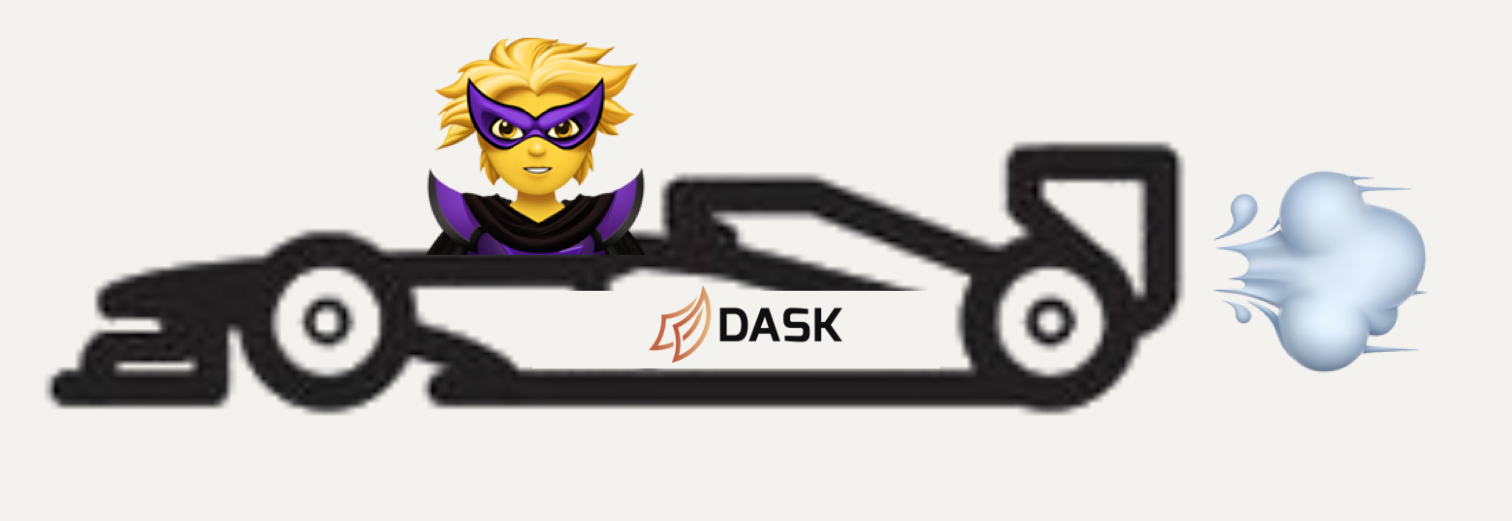

## Dask DataFrames

The pandas car...with the Dask engine!

In [2]:
import dask.dataframe as dd

In [3]:
%run ../prep_data.py -d flights

data_dir='/Users/rpelgrim/Documents/git/coiled-resources/dask-tutorial/data'


In [4]:
import os

files = os.path.join('../data', 'nycflights', '*.csv')
files

'../data/nycflights/*.csv'

In [5]:
df = dd.read_csv(files,
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={"TailNum": str,
                        "CRSElapsedTime": float,
                        "Cancelled": bool})

In [6]:
df.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,False,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,False,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,False,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,False,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,False,0


In [7]:
%%time
df.groupby("Origin")["DepDelay"].mean().compute()

CPU times: user 3.32 s, sys: 660 ms, total: 3.98 s
Wall time: 1.83 s


Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64

In [23]:
df

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,
,datetime64[ns],int64,float64,int64,float64,int64,object,int64,object,float64,float64,float64,float64,float64,object,object,float64,float64,float64,bool,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## Dask Arrays

The Numpy car...with Dask engine superpowers!

In [8]:
import dask.array as da

In [9]:
array = da.random.random((10000, 10000), chunks=(1000, 1000))

In [10]:
array

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [11]:
array[:10,:5]

dask.array<getitem, shape=(10, 5), dtype=float64, chunksize=(10, 5), chunktype=numpy.ndarray>

In [12]:
%%time
array.sum(axis=1).compute()

CPU times: user 603 ms, sys: 113 ms, total: 715 ms
Wall time: 174 ms


array([5038.91018019, 5013.58161531, 5014.28870888, ..., 5035.58920104,
       4988.62535192, 4999.33286478])

## Dask ML

The scikit-learn car with.... you guessed it -- Dask rocketfuel!

In [13]:
from dask_ml.linear_model import LogisticRegression
from dask_ml.datasets import make_classification

In [14]:
X, y = make_classification(n_samples=1_000, chunks=50)

In [15]:
X

dask.array<normal, shape=(1000, 20), dtype=float64, chunksize=(50, 20), chunktype=numpy.ndarray>

In [16]:
y

dask.array<astype, shape=(1000,), dtype=int64, chunksize=(50,), chunktype=numpy.ndarray>

In [17]:
lr = LogisticRegression()

In [18]:
%%time
lr.fit(X, y)

CPU times: user 2.35 s, sys: 589 ms, total: 2.94 s
Wall time: 2.44 s


LogisticRegression()

In [21]:
%%time
predictions = lr.predict(X).compute()

CPU times: user 30.6 ms, sys: 4.61 ms, total: 35.2 ms
Wall time: 32.5 ms


In [22]:
lr.score(X,y).compute()

0.679

## Custom Dask

In [4]:
from time import sleep

def inc(x):
    """Increments x by one"""
    sleep(1)
    return x + 1

def add(x=0, y=0, z=0):
    """Adds x and y"""
    sleep(1)
    return x + y + z

In [5]:
%%time

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 789 µs, sys: 1.3 ms, total: 2.09 ms
Wall time: 3 s


In [6]:
from dask import delayed

In [7]:
%%time

a = delayed(inc)(1)
b = delayed(inc)(2)
c = delayed(add)(a, b)

CPU times: user 679 µs, sys: 135 µs, total: 814 µs
Wall time: 774 µs


In [8]:
c

Delayed('add-5d511ddb-3776-41af-bcb1-ff6eb1fd6388')

In [9]:
a.visualize()

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

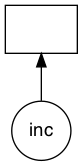

In [31]:
b.visualize()

In [33]:
d = delayed(inc)(3)

In [52]:
c = delayed(add)(a, b, d)

In [3]:
c.visualize()

NameError: name 'c' is not defined

In [51]:
%%time
c.compute()

CPU times: user 3.4 ms, sys: 3.55 ms, total: 6.95 ms
Wall time: 2.01 s


5

## Dask on Coiled (cloud cluster)

In [1]:
import coiled

In [2]:
cluster = coiled.Cluster(
    name="dask-tutorial", 
    n_workers=20, 
    software="ncclementi/dask-mini-tutorial",
    scheduler_options={'idle_timeout':'2hrs'},
    shutdown_on_close=False,
)

Output()

Found software environment build
Created FW rules: coiled-dask-rrpelgr71-64159-firewall
Created scheduler VM: coiled-dask-rrpelgr71-64159-scheduler (type: t3.medium, ip: ['3.231.146.109'])


ValueError: Cluster status is unexpectedly STOPPED: it was either unable to start up or died very quickly.

In [ ]:
from distributed import Client

client = Client(cluster)
client

In [ ]:
import dask.dataframe as dd

In [ ]:
df = dd.read_csv(
    "s3://nyc-tlc/trip data/yellow_tripdata_2019-*.csv",
    parse_dates=["tpep_pickup_datetime", "tpep_dropoff_datetime"],
    dtype={
        "payment_type": "UInt8",
        "VendorID": "UInt8",
        "passenger_count": "UInt8",
        "RatecodeID": "UInt8",
        "store_and_fwd_flag": "category",
        "PULocationID": "UInt16",
        "DOLocationID": "UInt16",
    },
    storage_options={"anon": True},
    blocksize="16 MiB",
)

In [6]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
npartitions=471,,,,,,,,,,,,,,,,,,
,UInt8,datetime64[ns],datetime64[ns],UInt8,float64,UInt8,category[unknown],UInt16,UInt16,UInt8,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
df.groupby("passenger_count").tip_amount.mean().compute()